In [250]:
pwd

'C:\\Users\\Anglo'

In [251]:
import os
from numpy import loadtxt
import pandas as pd
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [278]:
def warmUpExercise():
    A = np.eye(5)
    return A

In [279]:
data = pd.read_csv('C:\\semester 10\\machine learning\\house_prices_data_training_data.csv')
#X, y = data[:, 0], data[:, 1]
#m = y.size

In [280]:
data.dropna(inplace=True)
data.shape

(17999, 21)

In [281]:
del data['id']
del data['date']

#pd.set_option('display.max_columns', None)
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
5,1230000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,1963.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,1960.0,0.0,98146.0,47.5123,-122.337,1780.0,8113.0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,2003.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0


In [282]:
dfcorrnew=data.corr()
dfcorrnew.drop(dfcorrnew.index[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]] , inplace=True)
dfcorrnew.head()
dnew=dfcorrnew.iloc[0].to_numpy()
#print(dnew)
result = np.where(dnew < .3)
print(result)
#these are the indexes will be dropped 4,  5,  6,  8, 12, 13, 14, 16, 18 because correlation is less than 0.3



(array([ 4,  5,  6,  8, 12, 13, 14, 16, 18], dtype=int64),)


In [283]:
data.drop(data.columns[result], axis = 1, inplace = True)
data.head()


,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3.0,1.00,1180.0,0.0,7.0,1180.0,0.0,47.5112,1340.0
1,538000.0,3.0,2.25,2570.0,0.0,7.0,2170.0,400.0,47.7210,1690.0
2,180000.0,2.0,1.00,770.0,0.0,6.0,770.0,0.0,47.7379,2720.0
3,604000.0,4.0,3.00,1960.0,0.0,7.0,1050.0,910.0,47.5208,1360.0
4,510000.0,3.0,2.00,1680.0,0.0,8.0,1680.0,0.0,47.6168,1800.0


In [284]:
#lets do normalization
X=data.iloc[:,1:]
y=data.iloc[:,0] 
m = y.size

print(m)

17999


In [285]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
   
    # ================================================================
    return X_norm, mu, sigma

In [286]:
data_norm, mu, sigma = featureNormalize(data)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)
#print(data_norm)
data_norm = np.concatenate([np.ones((m, 1)), data_norm], axis=1)
data_norm=pd.DataFrame(data_norm)
data_norm.head()

Computed mean: price            533074.250347
bedrooms              3.362965
bathrooms             2.061601
sqft_living        2051.822323
view                  0.242458
grade                 7.592366
sqft_above         1749.742319
sqft_basement       302.080004
lat                  47.560211
sqft_living15      1973.236735
dtype: float64
Computed standard deviation: price            364402.027528
bedrooms              0.934006
bathrooms             0.758611
sqft_living         902.719076
view                  0.778835
grade                 1.169462
sqft_above          805.404988
sqft_basement       449.430523
lat                   0.139640
sqft_living15       673.168169
dtype: float64


,0,1,2,3,4,5,6,7,8,9,10
0,1.0,-0.853931,-0.388610,-1.399400,-0.965774,-0.311308,-0.506529,-0.707399,-0.672139,-0.350979,-0.940681
1,1.0,0.013517,-0.388610,0.248348,0.574019,-0.311308,-0.506529,0.521797,0.217876,1.151452,-0.420752
2,1.0,-0.968914,-1.459267,-1.399400,-1.419957,-0.311308,-1.361623,-1.216459,-0.672139,1.272477,1.109326
3,1.0,0.194636,0.682046,1.236996,-0.101717,-0.311308,-0.506529,-0.868808,1.352645,-0.282231,-0.910971
4,1.0,-0.063321,-0.388610,-0.081202,-0.411892,-0.311308,0.348565,-0.086593,-0.672139,0.405249,-0.257345


In [287]:
def train_validate_test_split(df, train_percent=.6, validate_percent=0.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train,validate,test
train , validate , test =train_validate_test_split(data_norm, train_percent=.6, validate_percent=0.2, seed=None)
print(validate.shape)
print(train.shape)
print(test.shape)

(3599, 11)
(10799, 11)
(3601, 11)


In [288]:
X_train=train.iloc[:,2:]
y_train=train.iloc[:,1] 
y_train.shape
y_train.head()

15823   -0.269137
2821    -0.551792
16249    1.075531
7189    -0.694492
7951     0.142496
Name: 1, dtype: float64

In [289]:
X_train.head(5)


,2,3,4,5,6,7,8,9,10
15823,-0.388610,0.577897,0.529708,-0.311308,1.203659,0.968777,-0.672139,-1.354987,0.589397
2821,-1.459267,-1.399400,-1.165171,-0.311308,-1.361623,-0.930889,-0.672139,0.012096,-0.702999
16249,0.682046,0.248348,0.064447,2.256629,0.348565,-0.185922,0.462630,0.871447,1.168747
7189,-0.388610,-0.410751,-0.633444,-0.311308,-0.506529,-0.334915,-0.672139,-1.416574,-0.777275
7951,0.682046,-0.410751,0.241689,-0.311308,0.348565,-0.558405,1.486147,1.457237,0.604252


In [290]:
X_val=validate.iloc[:,2:]
y_val=validate.iloc[:,1] 
X_val.head()

,2,3,4,5,6,7,8,9,10
11131,-0.388610,0.577897,-0.002019,-0.311308,0.348565,0.372803,-0.672139,-0.568682,0.247729
856,-0.388610,0.577897,-0.367581,-0.311308,-0.506529,-0.036928,-0.672139,-1.220356,-0.599013
9549,-1.459267,-1.399400,-1.519656,-0.311308,-2.216716,-1.328204,-0.672139,0.930169,-1.341770
14510,-0.388610,0.577897,0.108758,-0.311308,-1.361623,0.496964,-0.672139,-0.779222,-0.183070
16772,-0.388610,-1.399400,-0.677755,-0.311308,-0.506529,-0.384580,-0.672139,0.815589,-0.183070


In [291]:
X_test=test.iloc[:,2:]
y_test=test.iloc[:,1] 

In [292]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    # ==================================================================
    return J

In [293]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: 2    0.311861
Name: 1, dtype: float64
[0.47611994628011445, 0.4752141750276763, 0.47432563450623294, 0.4734539969309381, 0.4725989407524853, 0.47176015053848724, 0.47093731685711204, 0.4701301361629331, 0.4693383106849503, 0.46856154831674185, 0.46779956250870514, 0.46705207216234784, 0.4663188015265902, 0.4655994800960398, 0.46489384251120125, 0.46420162846058427, 0.4635225825846745, 0.46285645438173073, 0.46220299811537346, 0.46156197272393323, 0.4609331417315214, 0.460316273160794, 0.45971113944737496, 0.4591175173559064, 0.4585351878976972, 0.457963936249937, 0.4574035516764478, 0.4568538274499431, 0.45631456077576465, 0.45578555271707233, 0.45526660812145514, 0.45475753554893894, 0.4542581472013637, 0.453768258853105, 0.45328768978311157, 0.45281626270823805, 0.4523538037178437, 0.4519001422096372, 0.45145511082674056, 0.4510185453959507, 0.45059028486717584, 0.45017017125402364, 0.44975804957551935, 0.44935376779893316, 0.44895717678369496, 0

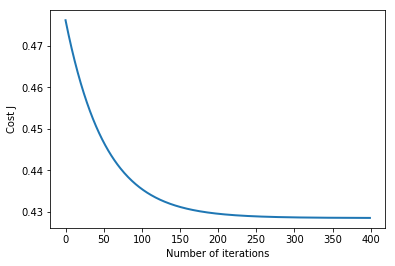

In [294]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_one = np.zeros(1)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:1], y_train, theta_one, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetaone_trained=theta
# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('thetaone_trained',thetaone_trained)

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2    0.084313
3    0.451625
Name: 1, dtype: float64
[0.4734909897357452, 0.470041375932787, 0.46669139680969574, 0.4634380991437169, 0.460278617951083, 0.4572101738441338, 0.45423007046765373, 0.4513356920120488, 0.44852450080106115, 0.4457940349517857, 0.4431419061048218, 0.440565797222457, 0.43806346045284306, 0.4356327150581872, 0.4332714454050374, 0.4309775990148017, 0.42874918467269574, 0.42658427059336546, 0.4244809826414879, 0.4224375026057007, 0.4204520665242609, 0.41852296306088504, 0.41664853192926216, 0.41482716236478456, 0.41305729164207733, 0.41133740363695714, 0.40966602743148434, 0.4080417359608207, 0.4064631447006364, 0.4049289103938521, 0.40343772981553666, 0.4019883385748167, 0.4005795099526882, 0.3992100537746542, 0.39787881531714464, 0.39658467424670557, 0.3953265435909747, 0.39410336874049173, 0.3929141264804182, 0.39175782405127013, 0.3906334982377952, 0.38954021448514786, 0.388477066041548, 0.38744317312662546, 0.386437682124

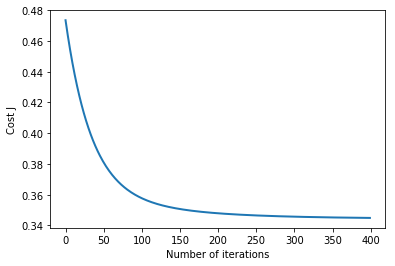

In [295]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_two = np.zeros(2)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:2], y_train, theta_two, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetatwo_trained=theta

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print(thetatwo_trained)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.075940
3    0.141428
4    0.574530
Name: 1, dtype: float64
[0.46893799002622943, 0.461174229937495, 0.45373705198513886, 0.44661216480781923, 0.43978590676966106, 0.43324521817633516, 0.42697761471730344, 0.42097116208011487, 0.4152144516850223, 0.40969657749047733, 0.4044071138222394, 0.3993360941809217, 0.3944739909847933, 0.389811696206557, 0.3853405028646515, 0.3810520873313616, 0.3769384924216868, 0.3729921112285122, 0.36920567167114193, 0.36557222172571263, 0.36208511530739235, 0.3587379987755985, 0.355524798034739, 0.35243970620419346, 0.34947717183241084, 0.3466318876311114, 0.3438987797066362, 0.34127299726650456, 0.33874990278020695, 0.3363250625741848, 0.33399423784183635, 0.33175337605023053, 0.3295986027260221, 0.3275262136038312, 0.3255326671210913, 0.3236145772440743, 0.321768706610477, 0.31999195997459784, 0.3182813779417496, 0.3166341309791434, 0.31504751369104195, 0.3135189393465197, 0.312045934648681, 0.31062613473468, 0.3

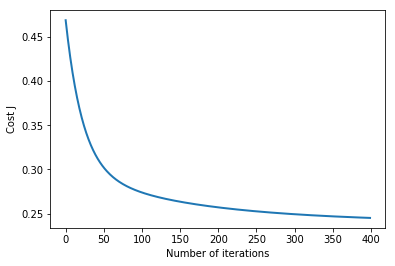

In [296]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_three = np.zeros(3)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:3], y_train, theta_three, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetathree_trained=theta

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.058187
3    0.127620
4    0.517108
5    0.219343
Name: 1, dtype: float64
[0.4674354746553331, 0.45824935732630107, 0.4494658176293099, 0.4410666163793238, 0.433034347952291, 0.4253524020800311, 0.41800492739810086, 0.41097679666616943, 0.40425357358413166, 0.39782148113071086, 0.3916673713546657, 0.3857786965519252, 0.3801434817650362, 0.3747502985442278, 0.369588239912185, 0.3646468964772814, 0.3599163336425578, 0.35538706986015384, 0.35105005588320665, 0.34689665496943767, 0.34291862399274564, 0.3391080954211329, 0.33545756012120276, 0.33195985095129305, 0.3286081271070507, 0.3253958591849157, 0.32231681493056596, 0.319365045640889, 0.3165348731894886, 0.31382087764711114, 0.3112178854696908, 0.30872095822796475, 0.30632538185380714, 0.30402665637956977, 0.3018204861478062, 0.29970277046979593, 0.29766959471227383, 0.2957172217927173, 0.2938420840644443, 0.2920407755736372, 0.29031004467122645, 0.28864678696335333, 0.2870480385848778, 0.28

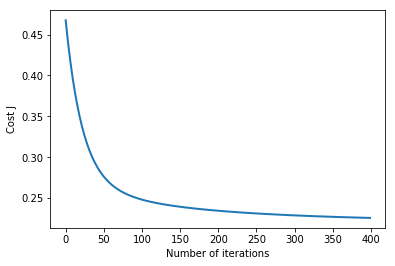

In [297]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_four = np.zeros(4)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:4], y_train, theta_four, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


thetatfour_trained=theta

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.042044
3    0.036646
4    0.355773
5    0.198235
6    0.317479
Name: 1, dtype: float64
[0.4632458523465149, 0.45022287446475134, 0.43792989396077026, 0.42632502234021424, 0.4153687890252095, 0.4050240015506366, 0.39525561384795055, 0.38603060214861773, 0.3773178480663111, 0.36908802844251276, 0.36131351156421054, 0.3539682593850089, 0.34702773540231596, 0.34046881786335803, 0.33426971799171334, 0.3284099029438923, 0.3228700232223009, 0.31763184428675656, 0.31267818212164533, 0.307992842529863, 0.3035605639379261, 0.2993669635091129, 0.29539848637324917, 0.2916423577928258, 0.28808653809557094, 0.28471968021342403, 0.281531089677126, 0.27851068692435665, 0.27564897178757847, 0.2729369900354819, 0.2703663018492316, 0.2679289521215795, 0.26561744247339253, 0.2634247048882406, 0.26134407687144173, 0.2593692780453733, 0.2574943880979662, 0.2557138260061004, 0.25402233046015293, 0.25241494142021564, 0.2508869827385192, 0.24943404578638892, 0.24805

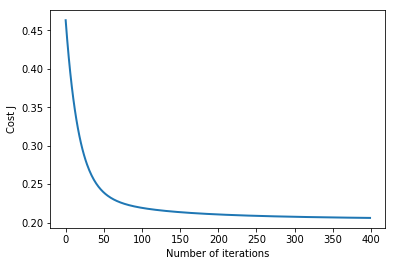

In [298]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_five = np.zeros(5)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:5], y_train, theta_five, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetatfive_trained=theta


# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.041139
3    0.028286
4    0.304247
5    0.207071
6    0.289828
7    0.084151
Name: 1, dtype: float64
[0.4599721809078334, 0.44410259630019305, 0.4293482573762061, 0.4156291152234685, 0.40287089394351966, 0.39100467382175913, 0.37996650460282627, 0.369697046696917, 0.3601412382995768, 0.3512479865532358, 0.3429698810139521, 0.33526292781225764, 0.3280863030133801, 0.32140212379007493, 0.31517523612147524, 0.30937301782429505, 0.3039651958089459, 0.2989236765331158, 0.2942223886995758, 0.28983713731383076, 0.28574546828111447, 0.2819265427814913, 0.27836102071681385, 0.2750309525742994, 0.27191967909881565, 0.2690117382098766, 0.2662927786400872, 0.2637494798095718, 0.26136947748598616, 0.25914129481224596, 0.2570542783142873, 0.25509853852917797, 0.25326489491987597, 0.25154482476703927, 0.24993041575064867, 0.24841432195495539, 0.24698972304951342, 0.24565028641691303, 0.24439013201440205, 0.2432037997719519, 0.2420862193435863, 0.2410326820

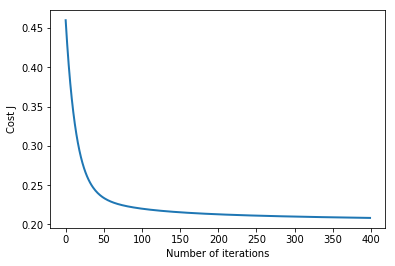

In [299]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_six = np.zeros(6)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:6], y_train, theta_six, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')


thetatsix_trained=theta
# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.066217
3    0.009479
4    0.221656
5    0.184545
6    0.290015
7    0.170191
8    0.140223
Name: 1, dtype: float64
[0.45896703604312705, 0.442203386956546, 0.4266551544189135, 0.41223238311755045, 0.39885180540383613, 0.3864363435756855, 0.3749146492116529, 0.36422067679822856, 0.3542932890972657, 0.34507589189054555, 0.33651609591441406, 0.3285654039602496, 0.3211789212672248, 0.3143150874733094, 0.30793542851956035, 0.3020043270222342, 0.29648880973784675, 0.2913583508486657, 0.28658468989085817, 0.28214166323520123, 0.2780050481114171, 0.2741524182423131, 0.27056301022342644, 0.2672175998482181, 0.2640983876384201, 0.2611888928942602, 0.25847385563030356, 0.2559391458098747, 0.2535716793347252, 0.2513593402870625, 0.24929090895849554, 0.24735599523510238, 0.2455449769399002, 0.2438489427636778, 0.24225963944262882, 0.24076942286664915, 0.2393712128257005, 0.2380584511234228, 0.2368250628073415, 0.2356654202836754, 0.23457431010202218, 0.2

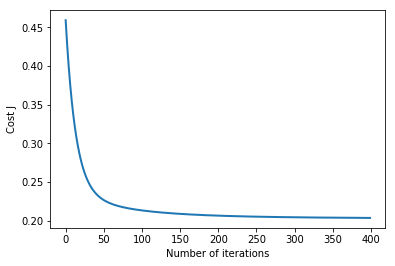

In [300]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_seven = np.zeros(7)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:7], y_train, theta_seven, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetatseven_trained=theta

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2   -0.055328
3    0.018522
4    0.219561
5    0.195724
6    0.252167
7    0.180935
8    0.116762
9    0.246983
Name: 1, dtype: float64
[0.45802225540011865, 0.4403530377363415, 0.4239361379569479, 0.4086794556826814, 0.39449773115857145, 0.38131203582422113, 0.3690493008495096, 0.35764188080575726, 0.3470271498533518, 0.3371471280220734, 0.32794813534103034, 0.3193804717423264, 0.3113981208173277, 0.30395847564760364, 0.2970220850651506, 0.29055241881916255, 0.28451565024011877, 0.2788804550970132, 0.2736178254407623, 0.26870089731680274, 0.2641047913131525, 0.25980646498726495, 0.2557845762863205, 0.2520193571415941, 0.24849249647861588, 0.2451870319413651, 0.2420872496810487, 0.23917859160842486, 0.2364475695534364, 0.2338816858173794, 0.23146935964120424, 0.2291998591490585, 0.22706323835904274, 0.2250502788835681, 0.22315243596984646, 0.2213617885570984, 0.21967099305116572, 0.21807324053952976, 0.21656221719038032, 0.21513206759848977, 0.2137

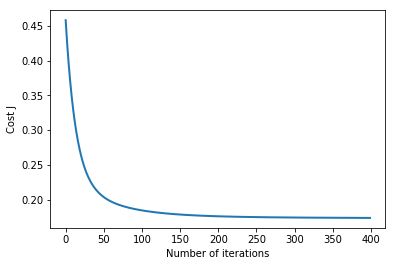

In [301]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_eight = np.zeros(8)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:8], y_train, theta_eight, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetateight_trained=theta
# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

theta computed from gradient descent: 2    -0.053784
3     0.019860
4     0.194690
5     0.187289
6     0.220844
7     0.154328
8     0.114487
9     0.245726
10    0.094271
Name: 1, dtype: float64
[0.4546260225786258, 0.4340852198714191, 0.41525900963885903, 0.3979995887573586, 0.3821719920197647, 0.3676529750494441, 0.35432999445915114, 0.3421002767884167, 0.33086996849029726, 0.320553359911257, 0.3110721768222897, 0.3023549336202451, 0.2943363428303451, 0.2869567760083171, 0.2801617715673246, 0.273901585444459, 0.2681307808772366, 0.26280785388524713, 0.25789489134853677, 0.2533572588449372, 0.24916331565561742, 0.24528415457368746, 0.2416933643566052, 0.23836681285112118, 0.23528244899112316, 0.23242012202541945, 0.2297614164755404, 0.2272895014542224, 0.2249889930944548, 0.22284582894780794, 0.22084715331012011, 0.21898121252333297, 0.2172372593850774, 0.21560546587321383, 0.21407684346155337, 0.21264317036599542, 0.2112969251178456, 0.2100312259135916, 0.20883977523836333, 0.20771

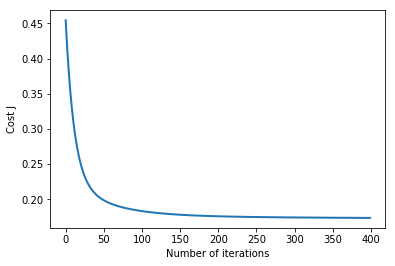

In [302]:
alpha = 0.01
num_iters = 400

# init theta and run gradient descent
theta_nine = np.zeros(9)
theta, J_history = gradientDescentMulti(X_train.iloc[:,0:9], y_train, theta_nine, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

thetatnine_trained=theta

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))
# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

normalize_test_data = None
normalize_test_data = None
price = 0
# print 'Predicted price of a 1650 sq-ft, 3 br house:', price

# ===================================================================
print(J_history)
print('J =',J_history[-1])
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

# So .. Feature 7 has the least J with j=0.17

# Now Lets get J values fo the validation part

In [303]:
j1=computeCostMulti(X_val.iloc[:,0:1], y_val, thetaone_trained)
j2=computeCostMulti(X_val.iloc[:,0:2], y_val, thetatwo_trained)
j3=computeCostMulti(X_val.iloc[:,0:3], y_val, thetathree_trained)
j4=computeCostMulti(X_val.iloc[:,0:4], y_val, thetatfour_trained)
j5=computeCostMulti(X_val.iloc[:,0:5], y_val, thetatfive_trained)
j6=computeCostMulti(X_val.iloc[:,0:6], y_val, thetatsix_trained)
j7=computeCostMulti(X_val.iloc[:,0:7], y_val, thetatseven_trained)
j8=computeCostMulti(X_val.iloc[:,0:8], y_val, thetateight_trained)
j9=computeCostMulti(X_val.iloc[:,0:9], y_val, thetatnine_trained)
#theta_one_val = thetaone_trained
#theta, J_history = gradientDescentMulti(X_val.iloc[:,0:1], y_val, theta_one_val, alpha, num_iters)
print ('j1=',j1)
print ('j2=',j2)
print ('j3=',j3)
print ('j4=',j4)
print ('j5=',j5)
print ('j6=',j6)
print ('j7=',j7)
print ('j8=',j8)
print ('j9=',j9)

j1= 0.4077958609379826
j2= 0.3208663883956447
j3= 0.22859161568597522
j4= 0.2063628890442122
j5= 0.18810062296397695
j6= 0.18887335860798232
j7= 0.1875871309912664
j8= 0.15788732614573436
j9= 0.158157204845281


# So the least J is j8  (feature 7) = 0.208 ... in the training part also feature 7 has the least J ... so Degree 7 is the best degree

In [304]:
#thetafinal=[thetaone_trained,thetatwo_trained,thetathree_trained,thetatfour_trained,thetatfive_trained,thetatsix_trained,thetatseven_trained,thetateight_trained,thetatnine_trained]


j_general=computeCostMulti(X_test.iloc[:,0:8], y_test, thetateight_trained)
print ('j_general',j_general)



j_general 0.23966606069854435
